In [324]:
import numpy as np
import pandas as pd
import random 

In [325]:
import pygad
import matplotlib.pyplot as plt

# Inicijalizacija podataka(tačaka):

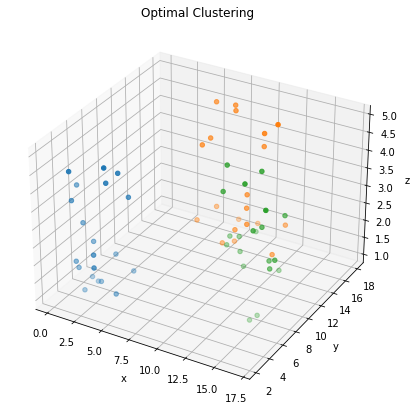

In [326]:
cluster1_num_samples = 20
cluster1_x1_start = 0
cluster1_x1_end = 5
cluster1_x2_start = 2
cluster1_x2_end = 6
cluster1_x3_start = 1
cluster1_x3_end = 5
cluster1_x1 = np.random.random(size=(cluster1_num_samples))
cluster1_x1 = cluster1_x1 * (cluster1_x1_end - cluster1_x1_start) + cluster1_x1_start
cluster1_x2 = np.random.random(size=(cluster1_num_samples))
cluster1_x2 = cluster1_x2 * (cluster1_x2_end - cluster1_x2_start) + cluster1_x2_start
cluster1_x3 = np.random.random(size=(cluster1_num_samples))
cluster1_x3 = cluster1_x3 * (cluster1_x3_end - cluster1_x3_start) + cluster1_x3_start

cluster2_num_samples = 20
cluster2_x1_start = 4
cluster2_x1_end = 12
cluster2_x2_start = 14
cluster2_x2_end = 18
cluster2_x3_start = 1
cluster2_x3_end = 5
cluster2_x1 = np.random.random(size=(cluster2_num_samples))
cluster2_x1 = cluster2_x1 * (cluster2_x1_end - cluster2_x1_start) + cluster2_x1_start
cluster2_x2 = np.random.random(size=(cluster2_num_samples))
cluster2_x2 = cluster2_x2 * (cluster2_x2_end - cluster2_x2_start) + cluster2_x2_start
cluster2_x3 = np.random.random(size=(cluster2_num_samples))
cluster2_x3 = cluster2_x3 * (cluster2_x3_end - cluster2_x3_start) + cluster2_x3_start

cluster3_num_samples = 20
cluster3_x1_start = 12
cluster3_x1_end = 18
cluster3_x2_start = 6
cluster3_x2_end = 9
cluster3_x3_start = 1
cluster3_x3_end = 5
cluster3_x1 = np.random.random(size=(cluster3_num_samples))
cluster3_x1 = cluster3_x1 * (cluster3_x1_end - cluster3_x1_start) + cluster3_x1_start
cluster3_x2 = np.random.random(size=(cluster3_num_samples))
cluster3_x2 = cluster3_x2 * (cluster3_x2_end - cluster3_x2_start) + cluster3_x2_start
cluster3_x3 = np.random.random(size=(cluster3_num_samples))
cluster3_x3 = cluster3_x3 * (cluster3_x3_end - cluster3_x3_start) + cluster3_x3_start

c1 = np.array([cluster1_x1, cluster1_x2, cluster1_x3]).T
c2 = np.array([cluster2_x1, cluster2_x2, cluster2_x3]).T
c3 = np.array([cluster3_x1, cluster3_x2, cluster3_x3]).T

# c1 = np.array([cluster1_x1, cluster1_x2]).T
# c2 = np.array([cluster2_x1, cluster2_x2]).T
# c3 = np.array([cluster3_x1, cluster3_x2]).T


data = np.concatenate((c1, c2, c3), axis=0)

#fig,ax=plt.subplots(figsize=(16,7))

#dodato
fig=plt.figure(figsize=(16,7))
ax=fig.add_subplot(111,projection='3d')
ax.set_title("Klasterovanje tacaka genetskim algoritmom(3D): ")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
#dodato_kraj 
ax.scatter(cluster1_x1, cluster1_x2, cluster1_x3)
ax.scatter(cluster2_x1, cluster2_x2, cluster2_x3)
ax.scatter(cluster3_x1, cluster3_x2, cluster3_x3)

# plt.scatter(cluster1_x1, cluster1_x2)
# plt.scatter(cluster2_x1, cluster2_x2)
# plt.scatter(cluster3_x1, cluster3_x2)

plt.title("Optimal Clustering")
plt.show()






In [327]:
points0=data.tolist()


# za cuvanje random tacaka

# with open(r'savedInput1.txt', 'w') as fp:
#     for item in points0:
#         # write each item on a new line
#         fp.write("%s\n" % item)
#     print('Done')

points0

[[3.3583965455426137, 2.7050774447640227, 2.444860638428754],
 [2.1199160959058636, 4.515135337521602, 2.400160869839957],
 [3.675647254626235, 4.098251427285289, 4.225924920259923],
 [2.950746653696781, 4.204940216225572, 1.3898581654129272],
 [1.3805264365509884, 3.5306797582226825, 1.7595113453876619],
 [1.277885372567162, 2.7821734692001856, 4.543321347598191],
 [0.14948361680809708, 5.298152596243308, 3.673388300323066],
 [1.8226656121934721, 4.644694488728243, 1.3406658280837322],
 [3.882062207350912, 3.5906375383112583, 4.7372373872818585],
 [1.2541017173325564, 4.419421990353074, 2.862075301785399],
 [1.722873465685647, 3.724971310161311, 1.1133437449554981],
 [3.4561743662147077, 5.521316624020784, 1.989940185502633],
 [4.290246421242687, 4.8032804733752, 4.435514627554012],
 [4.658473296074183, 5.610822095747334, 3.6809046290134875],
 [3.6955201338551946, 2.2306558466806514, 2.1991192141536984],
 [2.2093925051987577, 4.8629586715633515, 1.2073806555471296],
 [4.77264505473823

# Reprezentacija jedinke:

In [334]:
class Individual:
    def __init__(self,points,num_clusters):
        #inicijalizujemo jedinke kao listu slucajnoodabranih tacaka duzine broja klastera:
        self.code=[points[random.randrange(len(points))] for _ in range(num_clusters)] 
        self.fitness = self.calcFitness(points,num_clusters)
        #self.centroids=self.calculateCentroids(points)
        
    def __lt__(self, other):
        return self.fitness < other.fitness
    
    
    def ed(self,a,b):
        a=np.array(a)
        b=np.array(b)
        dist=np.linalg.norm(a-b)
        
        return dist
    #odredjuje kom klasteru pripada tacka point:
    def cluster_id(self,point,centers):
        d=float('inf')
        index=-1
        best_d=float('inf')
        
        for i,c in enumerate(centers):
            new_d=self.ed(point,c)
            if new_d<best_d:
                best_d=new_d
                index=i
   
        return index
        
    def sse_partial(self,points,cluster_index):
        #s=0
        sc=0
        
        for p in points:
            if self.cluster_id(p,self.code)==cluster_index:
                sc+=(self.ed(p,self.code[cluster_index]))**2
                #if p[-1]==cluster_index:
            
        return sc
    
    #SSE(Sum squared error)-metrika koju koristimo za racunanje fitness-a
    def sse(self,points,num_clusters):
        s=0
        for k in range(num_clusters):
            s+=self.sse_partial(points,k)
        
        return s
   

    def calcFitness(self,points,num_clusters):
        
        error=self.sse(points,num_clusters)
        fitness=1/error
        
        return fitness


In [335]:
def readFile(filename):
    with open(filename, 'r') as f:
        num_points,dim=[int(x) for x in f.readline().split()]
        points=[[float(x) for x in f.readline().split()] for _ in range(num_points)]
        return points

In [336]:
# points=readFile("input2.txt")
# points=readFile("input3.txt")

In [337]:
# points

In [338]:
import copy

points = copy.deepcopy(points0)
points1 = copy.deepcopy(points0)

In [339]:
num_points=len(points)
num_dimensions=len(points[0])
print(num_points,num_dimensions)

60 3


In [340]:
#Eucledian distance-Euklidsko rastojanje
def ed(a,b):
    a=np.array(a)
    b=np.array(b)
    dist=np.linalg.norm(a-b)
    return dist

In [341]:
print(ed(points[1],points[2]))

2.434646997129824


In [342]:
def cluster_id(point,centers):
    d=float('inf')
    index=-1
    best_d=float('inf')
    for i,c in enumerate(centers):
        new_d=ed(point,c)
        if new_d<best_d:
            best_d=new_d
            index=i
            
    return index

In [343]:
def crossover(parent1,parent2,child1,child2):
    breakpoint = random.randrange(len(parent1.code))
    
    child1.code[:breakpoint] = parent1.code[:breakpoint]
    child2.code[:breakpoint] = parent2.code[:breakpoint]
    
    child1.code[breakpoint:] = parent2.code[breakpoint:]
    child2.code[breakpoint:] = parent1.code[breakpoint:]
    
    #print(breakpoint)

In [344]:
def selection(population):
    
    TOURNAMENT_SIZE = 5
    bestFitness = float('-inf')
    index = -1
    for i in range(TOURNAMENT_SIZE):
        randomIndividual = random.randrange(len(population))
        if population[randomIndividual].fitness > bestFitness:
            bestFitness = population[randomIndividual].fitness
            index = randomIndividual
    return index
    
    
    #biramo random predstavnika za svaki klaster
    #koji ce se vremenom unaprediti i tako ce napredovati ceo proces

In [345]:
def mutation(individual):
    #alfa=random vrednost kojom ce se za neki vektor pomeriti trenutni centar klastera
    #c_a =random int koji uz alfa utice na pomeraj centra
    #kao parametar/verovatnocu mutacije uzimamo 5% (MUTATION_RATE=0.05)
    MUTATION_PROB=0.05
    
    for i in range(len(individual.code)):
        l=np.array(individual.code[i])
        alpha=random.uniform(0,1)
        c_a=random.randint(0,3)
        znak=random.uniform(0,1)
        if random.random()<MUTATION_PROB:
            if znak>=0.5:
                l=l+(alpha*c_a)
                l=np.round(l,2)
                individual.code[i]=l.tolist()
            else:
                l=l - (alpha*c_a)
                l=np.round(l,2)
                individual.code[i]=l.tolist()
    

In [346]:
# points=data.tolist()

# Parametri genetskog algoritma:


In [347]:
POPULATION_SIZE = 30
NUM_GENERATIONS = 30
ELITISIM_SIZE = POPULATION_SIZE // 5
num_clusters=3

In [348]:

population = [Individual(points,num_clusters) for _ in range(POPULATION_SIZE)]
newPopulation = [Individual(points,num_clusters) for _ in range(POPULATION_SIZE)]

for i in range(NUM_GENERATIONS):
    population.sort(reverse=True)
    newPopulation[:ELITISIM_SIZE] = population[:ELITISIM_SIZE]
    
    for j in range(ELITISIM_SIZE, POPULATION_SIZE, 2):
        
        parent1Index = selection(population)
        parent2Index = selection(population)
        
        crossover(population[parent1Index], population[parent2Index], newPopulation[j], newPopulation[j+1])
        
        #print(j)
        #print(population[parent1Index].code)
        #print(population[parent2Index].code)
        mutation(newPopulation[j])
        mutation(newPopulation[j+1])
        
        newPopulation[j].fitness = newPopulation[j].calcFitness(points,num_clusters)
        newPopulation[j+1].fitness = newPopulation[j+1].calcFitness(points,num_clusters)
        
#         print(j)
#         print(newPopulation[j].code)
#         print(newPopulation[j+1].code)
#         print()
#         print()
        
    population = newPopulation

    
bestIndividual = max(population)
print(f'solution: {bestIndividual.code}, fitness: {bestIndividual.fitness}')

solution: [[9.12, 14.51, 2.91], [14.49, 7.72, 2.96], [2.1199160959058636, 4.515135337521602, 2.400160869839957]], fitness: 0.002524260773962816


In [349]:
cluster_centers=copy.deepcopy(bestIndividual.code)

print(cluster_centers)

print(bestIndividual.code)

# c2 = cluster_centers[2]
# c1 = cluster_centers[1]
# cluster_centers[1] = c2
# cluster_centers[2] = c1


[[9.12, 14.51, 2.91], [14.49, 7.72, 2.96], [2.1199160959058636, 4.515135337521602, 2.400160869839957]]
[[9.12, 14.51, 2.91], [14.49, 7.72, 2.96], [2.1199160959058636, 4.515135337521602, 2.400160869839957]]


In [350]:
#Svakoj tacki skupa Points dodajemo kao poslednji element redni broj klastera kome bi trebalo da odgovaraju
def assign_center(points,centers):
    best_d=float("inf")
    ind=-1
    n=len(points[0])
    
    for p in points:
        best_d=float('inf')
        for j,c in enumerate(centers):
            if(len(p)==n and len(c)==n):
                d_new=ed(p,c)
            
                if d_new<best_d:
                    ind=j
                    best_d=d_new    
                    
        p.append(ind)
        

In [351]:
print(points[0],points[-1])


[3.3583965455426137, 2.7050774447640227, 2.444860638428754] [14.825428328297338, 8.025497665919087, 4.886425805197085]


In [352]:
assign_center(points,cluster_centers)
# points

In [353]:
print(points[0],points[-1])


[3.3583965455426137, 2.7050774447640227, 2.444860638428754, 2] [14.825428328297338, 8.025497665919087, 4.886425805197085, 1]


In [354]:
#pravimo matricu u kojoj svaki red predstavlja listu tacaka za svaki klaster redom
def create_cluster_arrays(points,centers):
    a=[]
    b=[]
    c=[]
    M=[]
    num_clusters=len(centers)
    for p in points:
        if p[-1]==0:
            a.append(p)
    
    #a=np.array(a)
    
    for p in points:
        if p[-1]==1:
            b.append(p)
    
    #b=np.array(a)
#     M=np.vstack((a,b))
    M.append(a)
    M.append(b)
    
    for i in range(2,num_clusters): 
        c.clear()
        for p in points:
            if p[-1]==i and i!=0 and i!=1:
                c.append(p)
#         c=np.array(c)        
        M.append(c)
    
    return M

In [355]:
M=create_cluster_arrays(points,cluster_centers)
M

[[[9.568375041865506, 14.925805587449513, 2.268842893289725, 0],
  [5.345752271192289, 17.26679157997042, 4.584232942679927, 0],
  [9.885723917337803, 17.015512382939207, 3.72764483140876, 0],
  [5.859432273860176, 15.535348684238457, 3.863278888480367, 0],
  [11.934798845352928, 15.50157051795985, 4.744342444270281, 0],
  [5.598466538113386, 14.70448788958463, 3.774036849517395, 0],
  [9.418614080005538, 15.237861342035291, 2.5918116656341765, 0],
  [7.217292068426801, 17.12331723167919, 4.50499141905517, 0],
  [8.789077089703518, 14.460763208625938, 1.6475670847548716, 0],
  [10.525181867893192, 15.91414890049907, 4.318768785687912, 0],
  [8.045811008306975, 15.655108419820184, 1.0360393395532297, 0],
  [5.0596797929947614, 14.770139563610574, 1.5427386357687949, 0],
  [9.9790342023564, 14.277890669416628, 1.9456529541762642, 0],
  [7.271788247856061, 17.625221189426963, 1.280054043236063, 0],
  [11.839027818205864, 15.137488250485388, 1.0832241488095073, 0],
  [8.917495726085452, 17

# K-Means algoritam za skup points:

In [356]:
#######################################################################

#k means

X = pd.DataFrame(points1)
X[1][0]

2.7050774447640227

In [357]:
#######
#scaling start
# otkomentarisi ovo i probaj
# kad se otkomentarise onda grafici lice


# from sklearn.preprocessing import MinMaxScaler

In [358]:
# scaler = MinMaxScaler()

In [359]:
# scaler.fit(X)

In [360]:
# X = scaler.transform(X)

In [361]:
# X = pd.DataFrame(X)

In [362]:
# X

#scaling end
######

In [363]:
from sklearn.cluster import KMeans

In [364]:
kmeans = KMeans(n_clusters=num_clusters, init='k-means++')

In [365]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [366]:
kmeans.cluster_centers_

array([[ 2.66865555,  4.16232579,  2.61809579],
       [ 8.38243463, 15.92610319,  2.66345541],
       [14.6536528 ,  7.13656807,  3.20852404]])

In [367]:
kmeans.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [368]:
# k means

########################################################

In [369]:
# uporedjeni centri dva algoritma
#dodata promenljiva ispod
k_means_centers=list(kmeans.cluster_centers_)
print("Centri genetskog algoritma: ")
print(cluster_centers)
print()
print("Centri algoritma k sredina: ")
print(kmeans.cluster_centers_)

Centri genetskog algoritma: 
[[9.12, 14.51, 2.91], [14.49, 7.72, 2.96], [2.1199160959058636, 4.515135337521602, 2.400160869839957]]

Centri algoritma k sredina: 
[[ 2.66865555  4.16232579  2.61809579]
 [ 8.38243463 15.92610319  2.66345541]
 [14.6536528   7.13656807  3.20852404]]


# ISCRTAVANJE DOBIJENIH KLASTERA I NJIHOVIH CENTARA:

In [370]:
import matplotlib.pyplot as plt

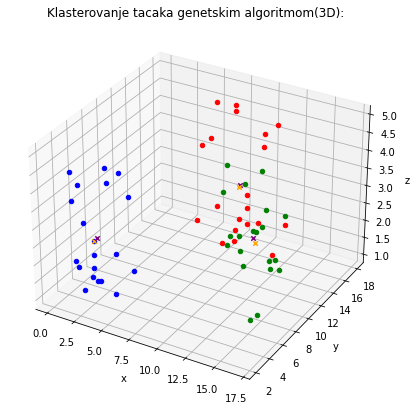

In [371]:
if num_dimensions==2:
    fig,ax=plt.subplots(figsize=(16,7))
    ax.set_title("Klasterovanje tacaka genetskim algoritmom(2D): ")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    
    colors=["red","green","black","yellow","blue"]
    for i in range(num_clusters):
        for j in range(len(M[i])):
            plt.scatter(((M[i])[j])[0],((M[i])[j])[1],c=colors[i])

    for j in range(num_clusters):
        plt.scatter((cluster_centers[j])[0],(cluster_centers[j])[1],c="orange",marker="x")
        
    
    for j in range(num_clusters):
        plt.scatter((k_means_centers[j])[0],(k_means_centers[j])[1],c="purple",marker="x")
        
elif num_dimensions==3:
    fig=plt.figure(figsize=(16,7))
    ax=fig.add_subplot(111,projection='3d')
    ax.set_title("Klasterovanje tacaka genetskim algoritmom(3D): ")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    colors=["red","green","blue","yellow","black"]
    for i in range(num_clusters):
        for j in range(len(M[i])):
            ax.scatter(((M[i])[j])[0],((M[i])[j])[1],((M[i])[j])[2],c=colors[i])

    for j in range(num_clusters):
        ax.scatter((cluster_centers[j])[0],(cluster_centers[j])[1],(cluster_centers[j])[2],c="orange",marker="x")
        
    
    for j in range(num_clusters):
        ax.scatter((k_means_centers[j])[0],(k_means_centers[j])[1],(k_means_centers[j])[2],c="purple",marker="x")

In [68]:





# for i in range(len(M)):
#         for j in range(len(M[i])):
#             ax.scatter(((M[i])[j])[0],((M[i])[j])[1],((M[i])[j])[2],c=colors[i])
#             print(((M[i])[j])[0],((M[i])[j])[1],((M[i])[j])[2])
#         print()

In [69]:
# points_tmp=points

# for p in points_tmp:
#     p.append(-1)
    
# #points_tmp[0].pop()
# #del points_tmp[0][-1]
# print(points_tmp[2][-1])
# print(points)
# print((points_tmp[2])[:-1])
# print(points_tmp)


In [70]:
# if num_dimensions==2:
#     fig,ax=plt.subplots(figsize=(16,7))
#     ax.set_title("Klasterovanje kmeans(2D): ")
#     ax.set_xlabel("x")
#     ax.set_ylabel("y")
    
#     colors=["red","green","black","yellow","blue"]
#     for i in range(len(points1)):
#         for j in range(num_clusters):
#             print(points1[i], kmeans.labels_[i])
#             ax.scatter(points1[i][j],points1[i][j],c=colors[kmeans.labels_[i]])


#     ax.scatter(kmeans.cluster_centers_[0],(cluster_centers[j])[1],kmeans.cluster_centers_[2],c="black",marker="x")
        
# elif num_dimensions==3:
#     fig=plt.figure(figsize=(16,7))
#     ax=fig.add_subplot(111,projection='3d')
#     ax.set_title("Klasterovanje tacaka kmeans(3D): ")
#     ax.set_xlabel("x")
#     ax.set_ylabel("y")
#     ax.set_zlabel("z")
#     colors=["red","green", "blue"]
    
#     for i in range(len(points1)):
#         ax.scatter(points1[i][0],points1[i][1],points1[i][2],c=colors[kmeans.labels_[i]])

    
#     ax.scatter(kmeans.cluster_centers_[0],(cluster_centers[j])[1],kmeans.cluster_centers_[2],c="black",marker="x")
    
#     points1